In [12]:
import pandas as pd
import matplotlib as plt

In [5]:
# processed_data=pd.read_csv("/home/shankar/GRA/R@/rica/projects/lathrop/day_1_62.5/predict_all_database/new_predict/processed_data.csv")
    
processed_data=pd.read_csv("/home/spoudel/Thesis/Data/Lathrope/lathrop/processed_data.csv")

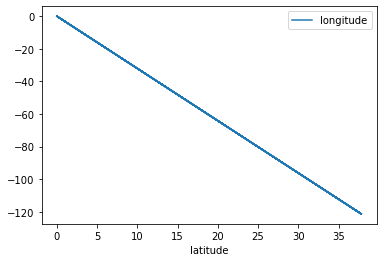

In [13]:
processed_data.plot(x="latitude",y="longitude")

In [8]:
cores=pd.read_csv("/home/spoudel/Thesis/Data/Lathrope/lathrop/lathrop-waypoints.csv")

In [9]:
cores

,Number,Name,Description,GeometryType,latitude,longitude,Altitude,density,Thickness
0,28,"Lathrop, R4, NDG 94.3",NaN,Point,37.819070,-121.289119,-0.557,93.4,2.7
1,27,"Lathrop, R5, NDG 94.5",NaN,Point,37.819072,-121.288548,-0.939,93.8,2.8
2,26,"Lathrop, R6, NDG 94",NaN,Point,37.819060,-121.287912,-1.676,92.7,2.7
3,25,"Lathrop, R3, NDG 95",NaN,Point,37.819033,-121.290488,-0.571,94.0,2.5
4,24,"Lathrop, R2, NDG 95",NaN,Point,37.819039,-121.291162,-2.239,95.0,2.4
5,23,"Lathrop, R1, NDG 95",NaN,Point,37.819026,-121.291552,-1.122,95.2,2.7


In [10]:
def get_data_to_look(processed_data,latitude,longitude,date=None):
        dlat=0.00001
        dlong=0.000013
        lat_min=latitude-dlat
        lat_max=latitude+dlat
        long_min=longitude-dlong
        long_max=longitude+dlong        
        if date:
            to_look=processed_data[(processed_data["latitude"]>lat_min) &
                         (processed_data["latitude"]<lat_max) &
                         (processed_data['longitude'] >=long_min) &
                         (processed_data['longitude']<=long_max) &
                         (processed_data['time']>= f'{date}T07:00:00Z') &
                         (processed_data['time']<=f'{date}T23:59:00Z')
            ]
        else:
            to_look=processed_data[(processed_data["latitude"]>lat_min) &
                         (processed_data["latitude"]<lat_max) &
                         (processed_data['longitude'] >=long_min) &
                         (processed_data['longitude']<=long_max)]        
        return to_look

In [11]:
# cores[["Latitude","Longitude"]].values

In [18]:
pass_ids=pd.concat([get_data_to_look(processed_data,lat,long) for lat,long in cores[["Latitude","Longitude"]].values])["passID"].unique()

In [19]:
pass_ids

array([ 30.,  31.,  32.,  47.,  48.,  49.,  51.,  52., 119.,  45.,  46.,
         0.,   1.,  16.,  17.,  18.,  40.,  41.])

In [22]:
def get_pass_ids(core_df,processed_data_df):
    pass_ids=pd.concat([get_data_to_look(processed_data_df,lat,long) for lat,long in core_df[["Latitude","Longitude"]].values])["passID"].unique()
    return pass_ids

get_pass_ids(core_df=cores,processed_data_df=processed_data)
    

array([ 30.,  31.,  32.,  47.,  48.,  49.,  51.,  52., 119.,  45.,  46.,
         0.,   1.,  16.,  17.,  18.,  40.,  41.])